<a href="https://colab.research.google.com/github/Praneethamurala1214/AICTE/blob/main/Project_3_Proposal_Level_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os, re, glob, math
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from IPython.display import display

In [2]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv.zip to creditcard.csv.zip


Dataset shape: (284807, 31)


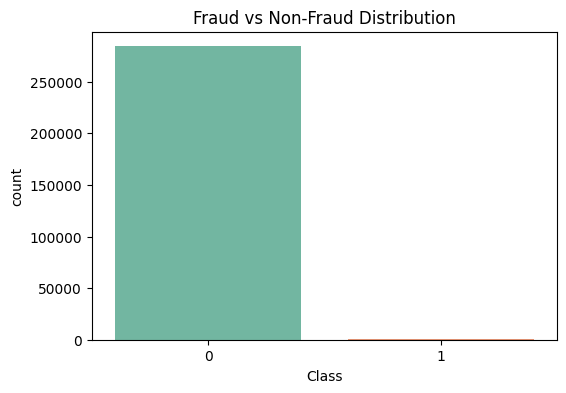

Class distribution:
 Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

---- Isolation Forest ----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.32      0.33      0.32        98

    accuracy                           1.00     56962
   macro avg       0.66      0.66      0.66     56962
weighted avg       1.00      1.00      1.00     56962



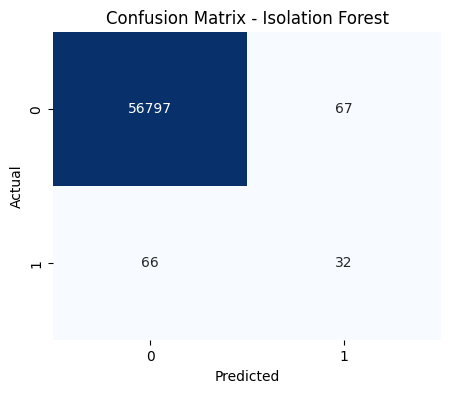


---- Local Outlier Factor ----
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00     56864
           1       0.00      1.00      0.00        98

    accuracy                           0.00     56962
   macro avg       0.00      0.33      0.00     56962
weighted avg       0.00      0.00      0.00     56962



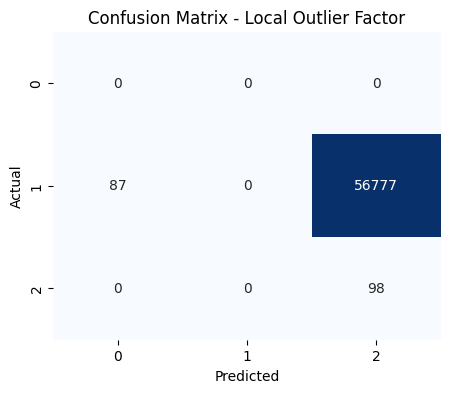

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix, classification_report
warnings.filterwarnings("ignore")
df = pd.read_csv("creditcard.csv.zip")
print("Dataset shape:", df.shape)
plt.figure(figsize=(6,4))
sns.countplot(x="Class", data=df, palette="Set2")
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()

print("Class distribution:\n", df["Class"].value_counts(normalize=True))
scaler = StandardScaler()
df["Amount"] = scaler.fit_transform(df[["Amount"]])
X = df.drop(columns=["Class", "Time"])
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
models = {
    "Isolation Forest": IsolationForest(contamination=0.0017, random_state=42),
    "Local Outlier Factor": LocalOutlierFactor(contamination=0.0017, novelty=True)
}
for name, model in models.items():
    print(f"\n---- {name} ----")

    if name == "Local Outlier Factor":
        model.fit(X_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train)
        y_pred = model.predict(X_test)
        y_pred = np.where(y_pred == -1, 1, 0)

    print(classification_report(y_test, y_pred, zero_division=0))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


Dataset shape: (284807, 31)

---- Logistic Regression ----
Accuracy: 0.9746
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



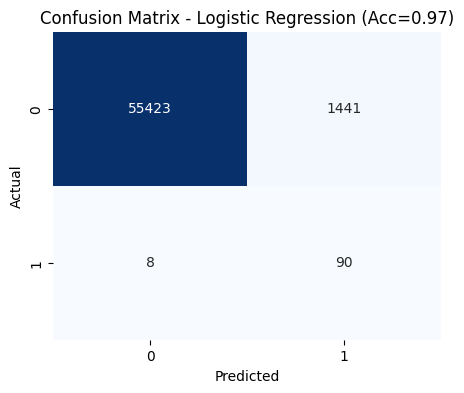


---- Decision Tree ----
Accuracy: 0.9694
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.88      0.09        98

    accuracy                           0.97     56962
   macro avg       0.52      0.92      0.54     56962
weighted avg       1.00      0.97      0.98     56962



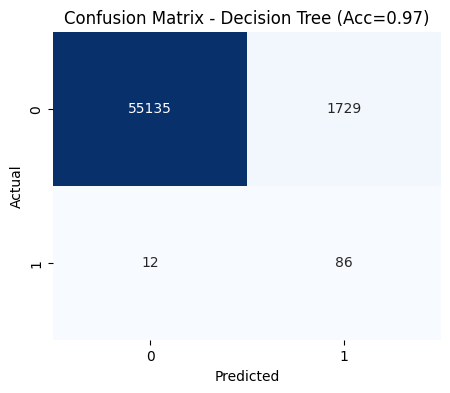


---- Neural Network ----
Accuracy: 0.9994
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.84      0.82        98

    accuracy                           1.00     56962
   macro avg       0.90      0.92      0.91     56962
weighted avg       1.00      1.00      1.00     56962



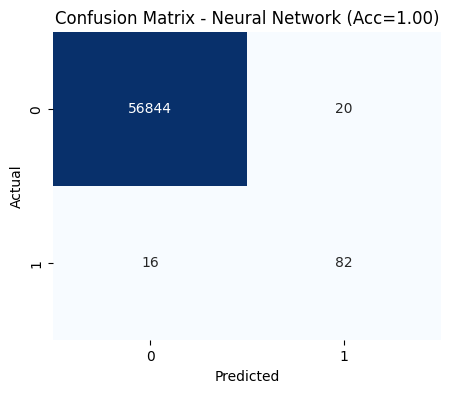

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df = pd.read_csv("creditcard.csv.zip")
print("Dataset shape:", df.shape)

scaler = StandardScaler()
df["Amount"] = scaler.fit_transform(df[["Amount"]])

X = df.drop(columns=["Class", "Time"])
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, class_weight="balanced", random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(64,32), max_iter=20, random_state=42)
}

for name, model in models.items():
    print(f"\n---- {name} ----")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print("Accuracy:", round(acc, 4))
    print(classification_report(y_test, y_pred, zero_division=0))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {name} (Acc={acc:.2f})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


Dataset shape: (284807, 31)


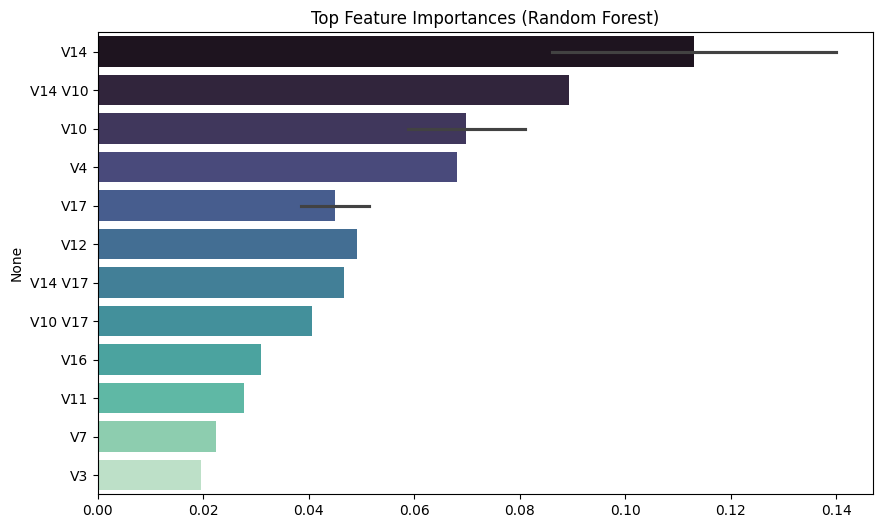


--- Logistic Regression Report ---
Accuracy: 0.9734
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.98     56962



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df = pd.read_csv("creditcard.csv.zip")
print("Dataset shape:", df.shape)

df = df.drop(columns=["Time"])

scaler = StandardScaler()
df["Amount"] = scaler.fit_transform(df[["Amount"]])

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
interaction_features = poly.fit_transform(df[["V14","V10","V17"]])
interaction_df = pd.DataFrame(interaction_features, columns=poly.get_feature_names_out(["V14","V10","V17"]))
df = pd.concat([df, interaction_df], axis=1)

X = df.drop(columns=["Class"])
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

rf = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
indices = np.argsort(importances)[-15:][::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=X.columns[indices], palette="mako")
plt.title("Top Feature Importances (Random Forest)")
plt.show()

lr = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("\n--- Logistic Regression Report ---")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print(classification_report(y_test, y_pred, zero_division=0))


In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.utils.class_weight import compute_class_weight

chunksize = 10000
dataset = pd.read_csv("creditcard.csv.zip", chunksize=chunksize)

model = SGDClassifier(loss="log_loss", random_state=42)
scaler = StandardScaler(with_mean=False)

sample_df = pd.read_csv("creditcard.csv.zip", nrows=50000)
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.array([0, 1]),
    y=sample_df["Class"]
)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print(" Class Weights:", class_weight_dict)

first_chunk = True
for chunk in dataset:
    chunk["Amount"] = scaler.fit_transform(chunk[["Amount"]])

    X = chunk.drop(columns=["Time", "Class"])
    y = chunk["Class"]

    X, y = shuffle(X, y, random_state=42)

    sample_weights = y.map(class_weight_dict)

    if first_chunk:
        model.partial_fit(X, y, classes=[0,1], sample_weight=sample_weights)
        first_chunk = False
    else:
        model.partial_fit(X, y, sample_weight=sample_weights)

print(" Model trained incrementally on dataset chunks.")

df_test = pd.read_csv("creditcard.csv.zip", nrows=20000)
df_test["Amount"] = scaler.fit_transform(df_test[["Amount"]])

X_test = df_test.drop(columns=["Time", "Class"])
y_test = df_test["Class"]

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {acc:.4f}")


 Class Weights: {0: np.float64(0.5014843938056648), 1: np.float64(168.9189189189189)}
 Model trained incrementally on dataset chunks.
Test Accuracy: 0.9709
